In [1]:
# Load all the reviews into a single df
import os
import pandas as pd

# Initialize empty list to store dataframes
dfs = []

# Walk through the RMPT100Reviews/combined directory
for root, dirs, files in os.walk('../../RMPT100Reviews/universities'):
    for file in files:
        if file == 'reviews.csv':
            # Construct full file path
            file_path = os.path.join(root, file)
            # Read CSV and append to list
            df = pd.read_csv(file_path)
            dfs.append(df)

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

# Format numbers to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(df.describe())


,index,clarity_rating,difficulty_rating,helpful_rating,quality_rating,textbook_use,thumbs_down_total,thumbs_up_total,would_take_again,pid
count,3396084.000,3396084.000,3396084.000,3396084.000,3396084.000,2962539.000,3396084.000,3396084.000,1514149.000,3396084.000
mean,27498.122,3.644,3.052,3.668,3.734,2.402,0.335,0.593,0.778,1298904.319
std,21383.378,1.500,1.222,1.517,1.480,2.193,2.476,8.208,0.416,913176.954
min,0.000,1.000,1.000,-1.000,1.000,-1.000,-99.000,-99.000,0.000,47.000
25%,10019.000,2.000,2.000,2.000,3.000,0.000,0.000,0.000,1.000,420036.000
50%,22674.000,4.000,3.000,4.000,4.000,3.000,0.000,0.000,1.000,1206166.000
75%,40959.000,5.000,4.000,5.000,5.000,5.000,0.000,0.000,1.000,2108671.000
max,107192.000,5.000,5.000,5.000,5.000,5.000,964.000,13600.000,1.000,3073231.000


This class is lecture heavy so get ready to write/type/record. The book is used some but the majority of his test questions come from lecture material
['test questions', 'lecture material']
Sentiment(polarity=0.0, subjectivity=0.5)
Processing sentiment analysis...


100%|██████████| 3396084/3396084 [26:46<00:00, 2114.61it/s]


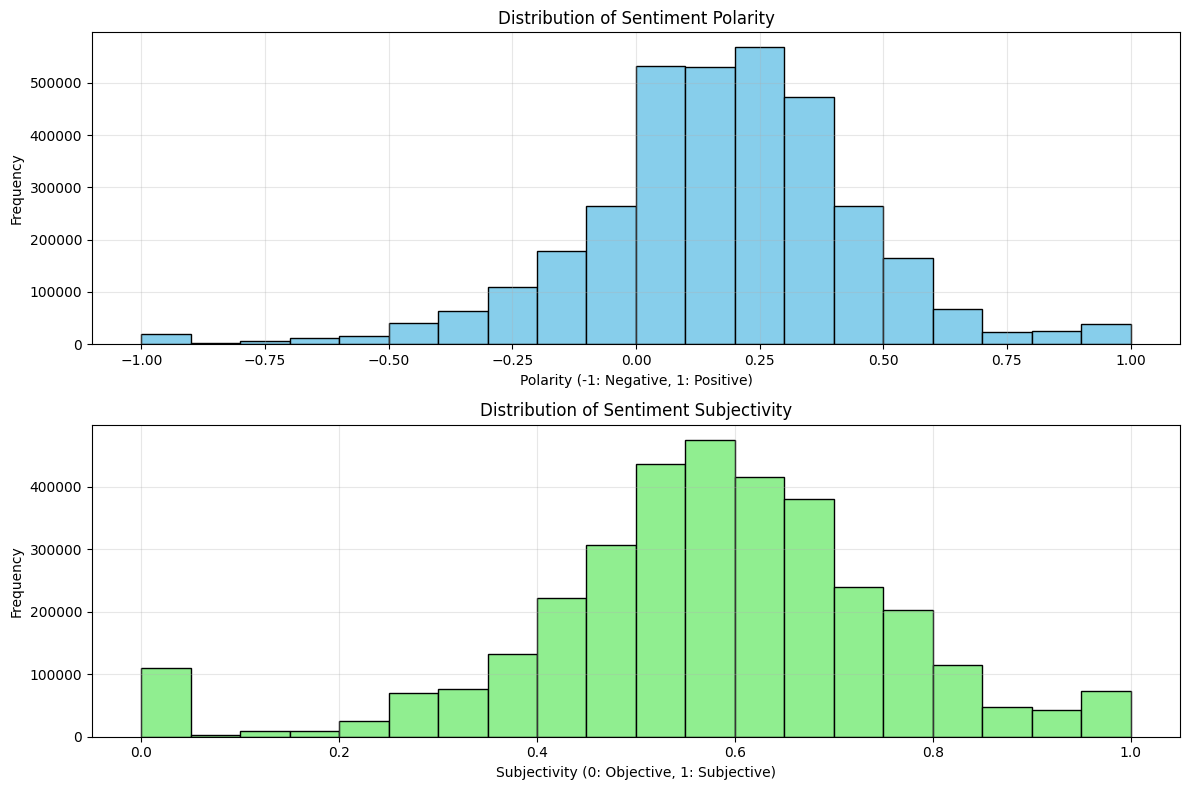

Average Polarity: 0.1737 (-1: Negative, 1: Positive)
Average Subjectivity: 0.5718 (0: Objective, 1: Subjective)


In [6]:
#Get the distribution of all the sentiments
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Let's do a little example with the first review
review = df.iloc[0]
print(review['comment'])

# Let's get the 'TextBlob' of the review
wiki = TextBlob(review['comment'])
print(wiki.noun_phrases)

# Let's get the sentiment of the review
sentiment = wiki.sentiment
print(sentiment) 
# This is a tuple with the polarity and subjectivity
# Polarity is a float between -1 and 1, with 1 indicating a very positive sentiment and -1 indicating a very negative sentiment
# Subjectivity is a float between 0 and 1, with 0 indicating a very objective sentiment and 1 indicating a very subjective sentiment

# Handle NaN values and convert to string before applying TextBlob
# Process both polarity and subjectivity in a single TextBlob call
polarities = []
subjectivities = []

print("Processing sentiment analysis...")
for comment in tqdm(df['comment']):
    if pd.notna(comment):
        blob = TextBlob(str(comment))
        polarities.append(blob.sentiment.polarity)
        subjectivities.append(blob.sentiment.subjectivity)
    else:
        polarities.append(0)
        subjectivities.append(0)

df['polarity'] = polarities
df['subjectivity'] = subjectivities

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# Plot polarity distribution
plt.subplot(2, 1, 1)
plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity (-1: Negative, 1: Positive)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Plot subjectivity distribution
plt.subplot(2, 1, 2)
plt.hist(df['subjectivity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Subjectivity (0: Objective, 1: Subjective)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display average sentiment metrics
avg_polarity = df['polarity'].mean()
avg_subjectivity = df['subjectivity'].mean()
print(f"Average Polarity: {avg_polarity:.4f} (-1: Negative, 1: Positive)")
print(f"Average Subjectivity: {avg_subjectivity:.4f} (0: Objective, 1: Subjective)")

Original polarity statistics:
count   3396084.000
mean          0.174
std           0.279
min          -1.000
25%           0.002
50%           0.190
75%           0.342
max           1.000
Name: polarity, dtype: float64


C:\Users\austi\AppData\Local\Temp\ipykernel_20360\2106310744.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized_polarity'].replace([np.inf, -np.inf], [3, -3], inplace=True)



Normalized polarity statistics:
count   3396084.000
mean         -0.000
std           0.996
min          -2.777
25%          -0.675
50%          -0.000
75%           0.674
max           2.571
Name: normalized_polarity, dtype: float64


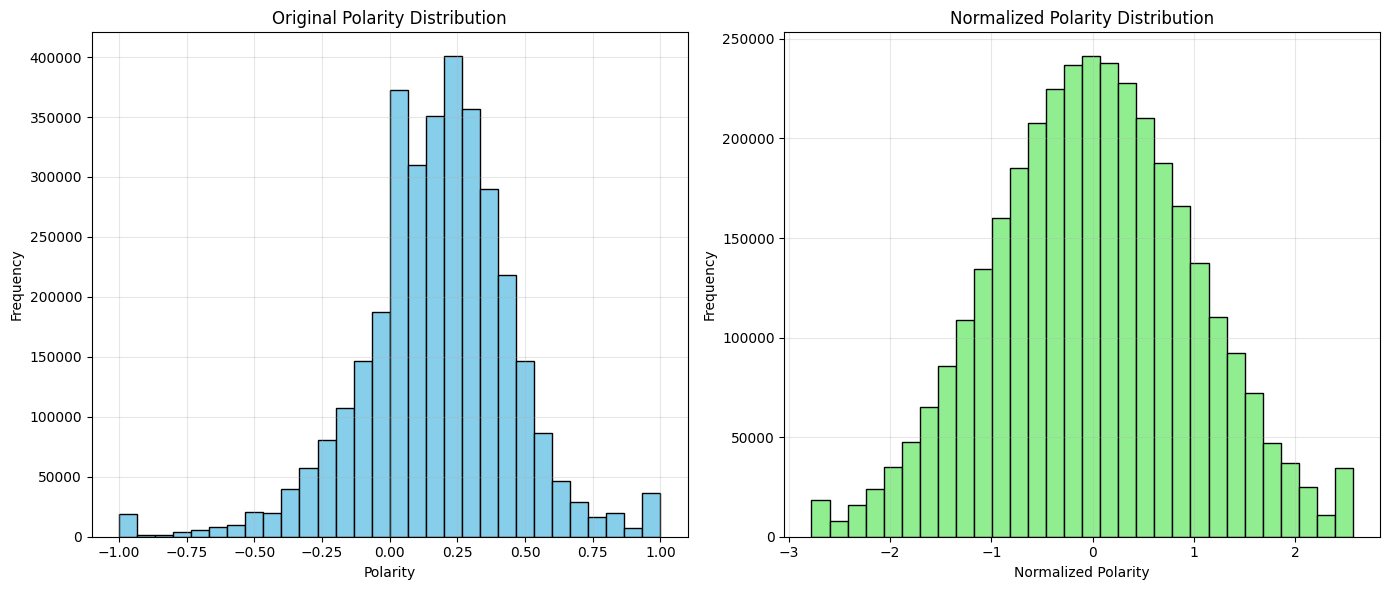

In [7]:
# Map polarity to a normal distribution
from scipy import stats
import numpy as np

# First, let's check the current distribution of polarity
print("Original polarity statistics:")
print(df['polarity'].describe())

# Create a new column with normalized polarity values
# Using the Probability Integral Transform to map to a normal distribution
# First, get the empirical CDF of the data
ecdf = stats.rankdata(df['polarity']) / len(df['polarity'])

# Then, apply the inverse normal CDF to get normally distributed values
df['normalized_polarity'] = stats.norm.ppf(ecdf)

# Replace any infinite values that might occur at the extremes
df['normalized_polarity'].replace([np.inf, -np.inf], [3, -3], inplace=True)

# Display statistics of the normalized distribution
print("\nNormalized polarity statistics:")
print(df['normalized_polarity'].describe())

# Plot the original vs normalized distributions
plt.figure(figsize=(14, 6))

# Original distribution
plt.subplot(1, 2, 1)
plt.hist(df['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Original Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Normalized distribution
plt.subplot(1, 2, 2)
plt.hist(df['normalized_polarity'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Normalized Polarity Distribution')
plt.xlabel('Normalized Polarity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
